# Knowledge Graph from Dependency

Parse knowledge graph from dependency parsing.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/knowledge-graph-from-dependency](https://github.com/huseinzol05/Malaya/tree/master/example/knowledge-graph-from-dependency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time

import malaya

CPU times: user 5.11 s, sys: 927 ms, total: 6.04 s
Wall time: 6.12 s


### Load dependency parsing models

Read more about dependency parsing at https://malaya.readthedocs.io/en/latest/load-dependency.html

In this example, I am going to load stacks of dependency parsing models.

In [3]:
quantized_model = malaya.dependency.transformer(model = 'xlnet', quantized = True)
alxlnet = malaya.dependency.transformer(model = 'alxlnet')

### Predict dependency parsing

In [3]:
s = 'Najib yang juga Ahli Parlimen Pekan memuji sikap Ahli Parlimen Langkawi itu yang mengaku bersalah selepas melanggar SOP kerana tidak mengambil suhu badan ketika masuk ke sebuah surau di Langkawi pada Sabtu lalu'
tagging, indexing = malaya.stack.voting_stack([quantized_model, alxlnet, quantized_model], s)

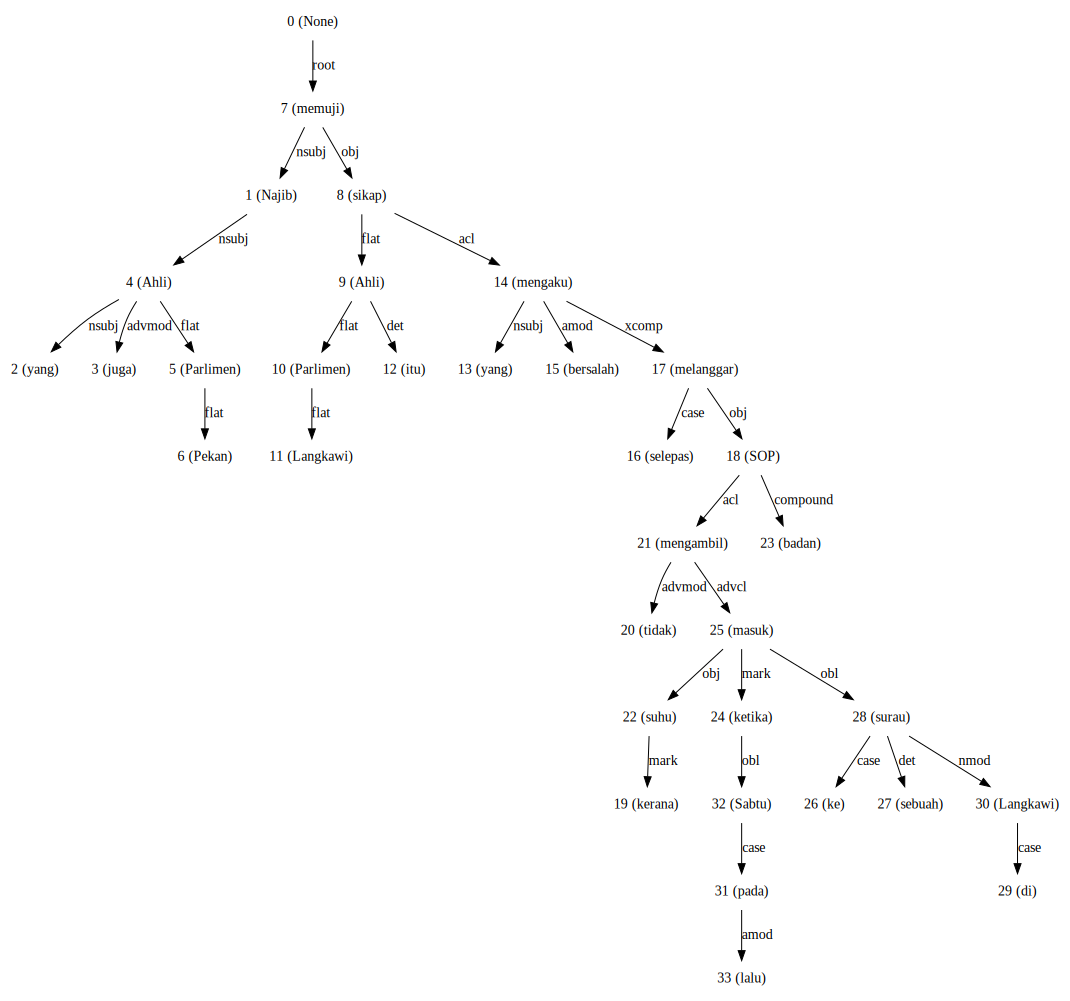

In [4]:
d_object = malaya.dependency.dependency_graph(tagging, indexing)
d_object.to_graphvis()

### Parse knowledge graph from dependency

```python
def parse_from_dependency(tagging, indexing,
                          subjects=[['flat', 'subj', 'nsubj', 'csubj']],
                          relations=[['acl', 'xcomp', 'ccomp', 'obj', 'conj', 'advcl'], ['obj']],
                          objects=[['obj', 'compound', 'flat', 'nmod', 'obl']],
                          get_networkx=True):
    """
    Generate knowledge graphs from dependency parsing.

    Parameters
    ----------
    tagging: List[Tuple(str, str)]
        `tagging` result from dependency model.
    indexing: List[Tuple(str, str)]
        `indexing` result from dependency model.
    subjects: List[List[str]], optional
        List of dependency labels for subjects.
    relations: List[List[str]], optional
        List of dependency labels for relations.
    objects: List[List[str]], optional
        List of dependency labels for objects.
    get_networkx: bool, optional (default=True)
            If True, will generate networkx.MultiDiGraph.

    Returns
    -------
    result: Dict[result, G]
    """
```

In [5]:
r = malaya.knowledge_graph.parse_from_dependency(tagging, indexing)

In [6]:
r

{'result': [{'subject': 'Najib Ahli Parlimen Pekan',
   'relation': 'memuji sikap mengaku melanggar SOP mengambil masuk',
   'object': 'suhu'},
  {'subject': 'Najib Ahli Parlimen Pekan',
   'relation': 'memuji sikap',
   'object': 'Ahli Parlimen Langkawi'}],
 'G': <networkx.classes.multidigraph.MultiDiGraph at 0x140338c10>}

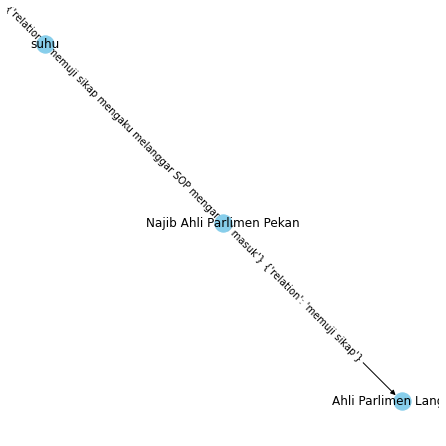

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

g = r['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

### Larger knowledge graph

Below I copy pasted from different news from google search, `isu israel`.

In [8]:
string = """
Kerajaan gabungan baharu Israel memeterai perjanjian termasuk berkaitan had tempoh jawatan Perdana Menteri, semalam.

Ia sekali gus akan menamatkan tempoh pemerintahan 12 tahun Benjamin Netanyahu sebagai Perdana Menteri, antara pemimpin negara itu yang lama memegang jawatan berkenaan.

Gabungan parti yang akan memerintah Israel dijangka memberi fokus kepada isu ekonomi dan sosial, berbanding risiko mendedahkan keretakan dalaman dengan cuba menangani isu diplomatik besar seperti konflik Israel-Palestin.

Netanyahu, 71, pemimpin Israel paling lama berkhidmat, akan digantikan esok oleh pemimpin gabungan yang buat kali pertama turut disertai sebuah parti minoriti Arab Israel.

Di bawah perjanjian perkongsian kuasa itu, Naftali Bennett daripada parti ultra nasionalis, Yamina dijangka akan dilantik sebagai Perdana Menteri selama dua tahun.

Bennett semalam berkata, kerajaan gabungan itu mahu 'mengakhiri krisis politik dua setengah tahun' walaupun tidak jelas berapa lama elemen berbeza dalam gabungan itu akan terus bersatu, lapor agensi berita ArabNews.

Beliau kemudian akan menyerahkan jawatan itu kepada bekas penyiar TV, Yair Lapid daripada parti Yesh Atid.

Kandungan perjanjian yang digariskan parti, yang disifatkan Lapid sebagai 'kerajaan perpaduan' antara lain mengehadkan tempoh jawatan Perdana Menteri kepada dua penggal atau lapan tahun.

Selain itu, pembinaan infrastruktur yang turut merangkumi hospital, universiti dan lapangan terbang baharu serta meluluskan belanjawan dua tahun untuk menstabilkan kewangan negara, yang mana kebuntuan politik yang berpanjangan menyebabkan Israel masih menggunakan versi pro-anggaran daripada belanjawan dasar 2019 yang disahkan pada pertengahan 2018.

Kandungan lain termasuk mempertahankan status-quo dalam isu agama dan negara, dengan parti Yamina memiliki hak veto dan rancangan menyeluruh pengangkutan di Tebing Barat yang diduduki Israel.

Sebagai pemimpin pembangkang dan ketua parti terbesar di Parlimen, Netanyahu dijangka terus melakukan apa saja dengan kuasanya untuk menjatuhkan kerajaan

Dakwaan beberapa pihak yang mengatakan bahawa Israel mempunyai hak untuk mempertahankan diri adalah tidak boleh diterima sama sekali.
Menurut bekas Perdana Menteri, Tun Dr Mahathir Mohamad, dakwaan itu sebaliknya merujuk kepada warga Palestin yang terpaksa mempertahankan hak mereka daripada diserang oleh rejim zionis Israel sejak seminggu lalu.
“Saya tidak boleh diterima dengan jawapan Israel yang mendakwa mereka ada hak mempertahan diri. Itu bukan mempertahankan diri, kerana sepanjang tempoh pergolakan ini, mereka menimbulkan konfrontasi dengan rakyat Palestin.

“Ini kerana, mereka ingin menceroboh lebih banyak tanah di Palestin. Saya yakin bahawa selepas ini, mereka akan mengambil alih Sheikh Jarrah misalnya dan mungkin akan mengambil alih tanah di kawasan terletaknya Masjid Al-Aqsa.
“Ini adalah taktik Israel, mereka tidak mempertahankan diri mereka, tetapi mereka menyerang pihak lain. Jika mereka mempertahankan diri, maka mereka harus berada di negara mereka sendiri.
“Tetapi mereka berperang di tanah Palestin, jadi alasan orang Israel bahawa mereka berhak untuk mempertahankan diri adalah tidak dapat diterima.
“Sememangnya, apa yang berlaku ketika ini ialah rakyat Palestin yang sedang berusaha mempertahankan diri dan mereka sangat lemah,” ujarnya.
Beliau berkata demikian semasa berucap menerusi satu sesi penstriman bertajuk ‘Palestine: Malaysia With Love’ di laman Facebook beliau pada malam Ahad.
Terdahulu, Presiden Amerika Syarikat (AS), Joe Biden menyuarakan sokongan tidak berbelah bahagi kepada hak Israel mempertahankan diri daripada serangan roket Hamas dan kumpulan pejuang lain.
Beliau menyuarakan pendirian itu dalam satu panggilan telefon bersama Presiden Palestin, Mahmoud Abbas. Pada masa sama, Setiausaha Pertahanan, Lloyd Austin pula mengulangi hak Israel untuk mempertahankan diri.

Arab Saudi menyelaras delegasi negara Arab ke Pertubuhan Bangsa-Bangsa Bersatu (PBB) bagi membincangkan usaha menangani kemelut Israel-Palestin.

Wakil tetap Arab Saudi ke PBB, Abdallah Al-Mouallami, bertemu dengan wakil tetap China ke PBB, yang juga Presiden Majlis Keselamatan PBB (UNSC) bulan ini, bagi membincangkan perkara itu.

Ia antara usaha Arab Saudi memimpin negara Arab lain memberi maklumat kepada UNSC mengenai serangan Israel terhadap rakyat Palestin, supaya masyarakat antarabangsa dapat menunaikan tanggungjawab melindungi orang awam.

Mesyuarat turut dihadiri Faisal Al-Haqbani, iaitu pegawai jawatankuasa politik khas delegasi tetap Arab Saudi ke PBB.

Al-Mouallami turut bertemu dengan Presiden Perhimpunan Agung PBB, Volkan Bozkır, dalam usaha Arab Saudi memimpin gerakan negara Islam untuk Palestin.

Pertemuan Kumpulan Islam dengan Presiden Perhimpunan Agung PBB itu bertujuan untuk menjelaskan mengenai serangan Israel baru-baru ini termasuk menggesa masyarakat antarabangsa melindungi orang awam.

Arab Saudi selalu mendahului sokongan kepada perjuangan Palestin di PBB, sebelum masyarakat antarabangsa berbuat demikian.

Kelmarin, Menteri Luar Arab Saudi, Putera Faisal bin Farhan, bercakap dengan Menteri Luar Palestin, Riyad Al-Maliki, menerusi panggilan telefon.

Dalam perbualan itu, beliau menegaskan pihaknya mengutuk amalan haram yang dilakukan pihak berkuasa Israel dan perlu tindakan segera untuk menghentikan pencabulan undang-undang dan nilai kemanusiaan antarabangsa.

Susulan permintaan Arab Saudi, Pertubuhan Kerjasama Islam (OIC) turut mengadakan mesyuarat tergempar hari ini bagi membincang keadaan di Baitulmaqdis dan Gaza

Mesyuarat antara menteri luar negara anggota OIC itu juga bermatlamat menangani serangan berterusan oleh Israel di wilayah Palestin

Rakyat Malaysia yang bertungkus-lumus bertindak sebagai ‘tentera siber’ di media sosial demi membantah tindakan kekerasan zionis Israel terhadap Palestin wajar diberikan penghargaan.

Hal ini kerana mereka tanpa mengira waktu terus memberikan pencerahan kepada semua pihak sehingga membuka mata penduduk seluruh dunia kekejaman militan Israel dalam siri serangan dan keganasan terhadap penduduk Gaza.

Presiden Barisan Jemaah Islamiah Se-Malaysia (Berjasa), Zamani Ibrahim antara lain berkata, parti itu mendukung tindakan kerajaan Hamas yang penuh komited berjuang bagi mempertahankan tanah air umat Islam di negara tersebut.

“Isu Palestin perlu dilihat dalam kerangka pertembungan antara haq dan batil yang mana umat Islam keseluruhannya perlu cakna dan berusaha memahami perkara ini dengan tuntas.

“Tanah Palestin merupakan milik rakyat Palestin secara sejarah dan undang-undang. Kehadiran militan Israel mengaku Palestin milik mereka pada tahun 1948 dan kemudiannya secara strategik menghalau penduduk asal adalah satu tindakan ‘Settler Colonialism’ yang terkutuk.

“Isu ini juga bukanlah semata-mata isu kemanusiaan tetapi ia juga mengenai soal penjarahan asing yang merampas tanah milik penduduk asal. Bukan sekadar merampas, malah lebih keji lagi penduduk asal dipenjara, diseksa, dihalau dan dibunuh dengan kejam sekali,” katanya dalam satu kenyataan di sini hari ini.

Kenyataan itu hadir susulan laporan media antarabangsa berhubung konflik antara Israel yang terus melancarkan serangan udara terhadap Gaza, Palestin sehingga hari ini.

Ketegangan antara kedua-dua negara tersebut yang bermula sejak Isnin minggu lalu, semakin meningkat sehingga Persatuan Bangsa-Bangsa Bersatu (PBB) memberi amaran ia bakal mencetuskan peperangan secara besar-besaran.

Siri keganasan itu meletus selepas konflik Israel-Palestin meningkat di Baitulmuqaddis Timur berikutan pasukan keselamatan Israel menyerbu Masjid Al-Asqa dan menyerang penduduk Palestin.

Dalam pada itu, beliau menggesa kerajaan untuk bertegas dan memainkan peranan selain menjadi negara pendesak kepada badan-badan antarabangsa bagi mengambil tindakan undang-undang menyelamatkan umat Islam sekali gus mempertahankan negara Palestin.

Malaysia, Indonesia dan Brunei menggesa agar satu sidang tergempar Perhimpunan Agung Pertubuhan Bangsa-Bangsa Bersatu (PBB) diadakan segera bagi menangani isu keganasan melampau rejim Israel ke atas rakyat Palestin.

Gesaan dibuat menerusi satu kenyataan bersama yang dikeluarkan oleh Perdana Menteri, Tan Sri Muhyiddin Yassin; Presiden Indonesia, Joko Widodo serta Sultan dan Yang Di-Pertuan Brunei Darussalam, Sultan Hassanal Bolkiah hari ini.
Ketiga-tiga pemimpin negara itu mahu sebuah resolusi keamanan dicapai bagi memastikan kekejaman yang menimpa rakyat Palestin ketika ini dapat dihentikan.

Mereka turut menuntut pihak berkepentingan untuk melaksanakan gencatan senjata serta menerima penglibatan pemantau antarabangsa di bandar Al-Quds, Palestin untuk memastikan gencatan itu dipatuhi.
"Kami menggesa komuniti antarabangsa untuk kekal dengan komitmen supaya penyelesaian dua negara (two-state solution) dilaksana dalam mencapai negara Palestin yang merdeka, berdasarkan sempadan sebelum 1967, dengan Baitulmaqdis sebagai ibu negara Palestin.
"Kami mengulangi solidariti dan komitmen kepada rakyat Palestin, termasuk hak mereka untuk menentukan nasib sendiri dan membentuk negara Palestin yang merdeka dan berdaulat," memetik kenyataan tersebut.
Ketiga-tiga pemimpin turut menyokong segala usaha antarabangsa yang terarah kepada perdamaian yang panjang di Asia Barat berdasarkan Resolusi PBB dan undang-undang antarabangsa serta undang-undang antarabangsa.
Pada masa sama, para pemimpin tiga negara itu turut membidas tindakan kejam Israel yang secara jelas melanggar hak asasi manusia, undang-undang antarabangsa dan kemanusiaan.
Mereka menyifatkan tindakan Israel itu adalah tidak berperikemanusiaan, bersifat penjajah dan ibarat pemerintahan aparteid.
"Maka, pentingnya tindakan segera dan kolektif dilakukan bagi memastikan tindakan sewajarnya terhadap pelaku," memetik kenyataan itu lagi.
"""

string = malaya.text.function.split_into_sentences(string)
len(string)

58

In [9]:
results = []
for s in string:
    try:
        tagging, indexing = malaya.stack.voting_stack([quantized_model, alxlnet, quantized_model], s)
        r = malaya.knowledge_graph.parse_from_dependency(tagging, indexing)
        results.append(r)
    except:
        pass
    
len(results), len(string)

(35, 58)

In [10]:
g = results[0]['G']

for i in range(1, len(results), 1):
    g.update(results[i]['G'])

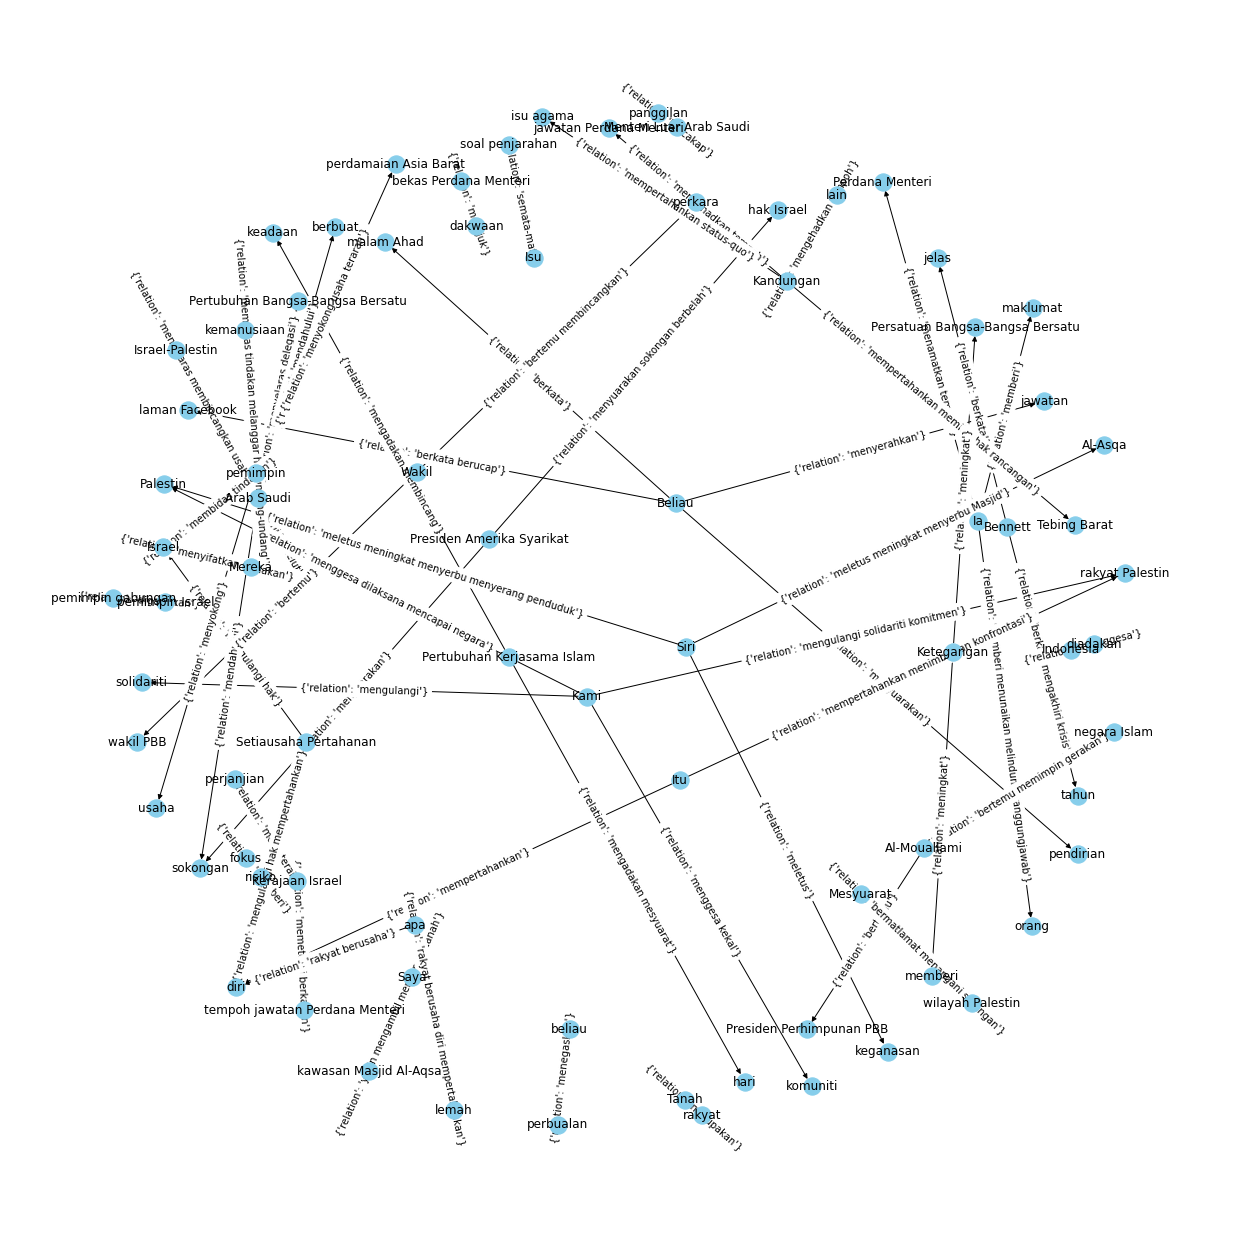

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(17, 17))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()